In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
df=pd.read_csv("cleaned_forest_fires.csv")
df.head()

In [ ]:
df.columns

In [ ]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)   

In [ ]:
df.tail()
df['Classes'].value_counts()

In [ ]:
## independent and dependent features 
x=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
x.head()
y 

In [36]:
## train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [22]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [26]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr
    

In [27]:
corr_features=correlation(x_train,0.85)


In [28]:
corr_features

{'BUI', 'DC'}

In [29]:
## drop features when correlation is greater than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

features scalling and standadization


In [33]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)   
x_test_scaled=scalar.transform(x_test)

In [34]:
x_train_scaled,x_train_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]]),
 array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -

mean absolute error: 0.5468236465249982
r2 score: 0.9847657384266951


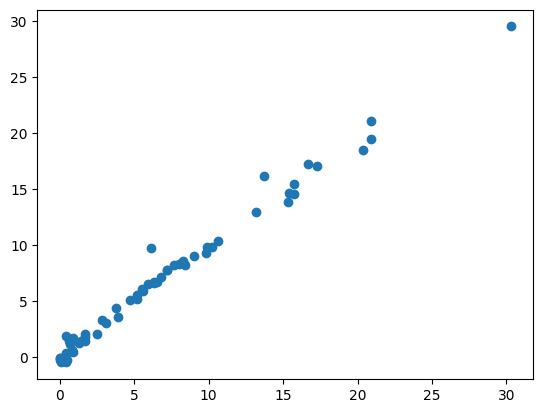

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lireg=LinearRegression()
lireg.fit(x_train_scaled,y_train)
y_pred=lireg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error:",mae)
print("r2 score:",score)
plt.scatter(y_test,y_pred)


Lasso regression


mean absolute error for lasso: 1.133175994914408
r2 score for lasso: 0.949202026311239


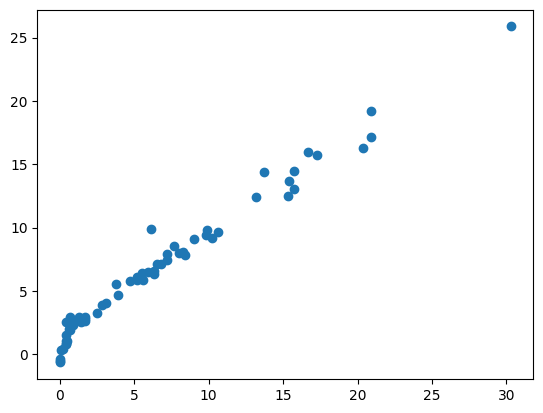

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
lasso_pred=lasso.predict(x_test_scaled)
mae_lasso=mean_absolute_error(y_test,lasso_pred)
score_lasso=r2_score(y_test,lasso_pred)
print("mean absolute error for lasso:",mae_lasso)
print("r2 score for lasso:",score_lasso)
plt.scatter(y_test,lasso_pred)


cross validation Lasso

In [39]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_train_scaled,y_train)


LassoCV(cv=5)

In [40]:
lasso_cv.alpha_

0.05725391318234408

In [41]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

mean absolute error for lasso cv: 0.6199701158263429
r2 score for lasso cv: 0.9820946715928275


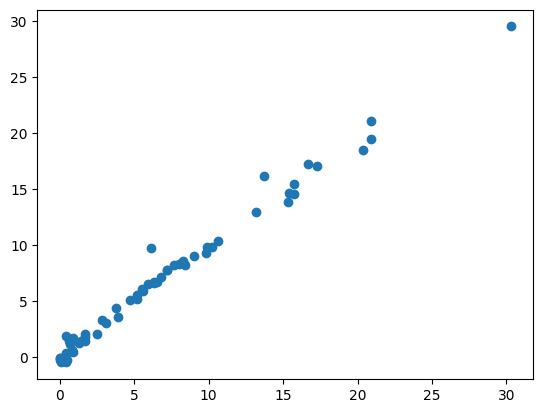

In [44]:
y_pred_cv=lasso_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae_lasso_cv=mean_absolute_error(y_test,y_pred_cv)
score_lasso_cv=r2_score(y_test,y_pred_cv)
print("mean absolute error for lasso cv:",mae_lasso_cv)
print("r2 score for lasso cv:",score_lasso_cv)


Ridge regression MOdel

mean absolute error for ridge: 0.5642305340105696
r2 score for ridge: 0.9842993364555513


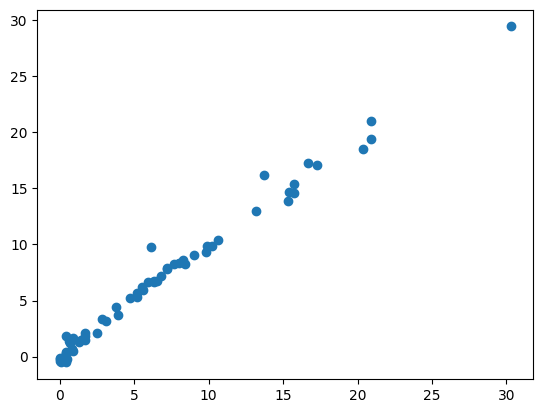

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
ridge_pred=ridge.predict(x_test_scaled)
mae_ridge=mean_absolute_error(y_test,ridge_pred)
score_ridge=r2_score(y_test,ridge_pred)
print("mean absolute error for ridge:",mae_ridge)
print("r2 score for ridge:",score_ridge)
plt.scatter(y_test,ridge_pred)

mean absolute error for ridge cv: 0.5642305340105696
r2 score for ridge cv: 0.9842993364555513


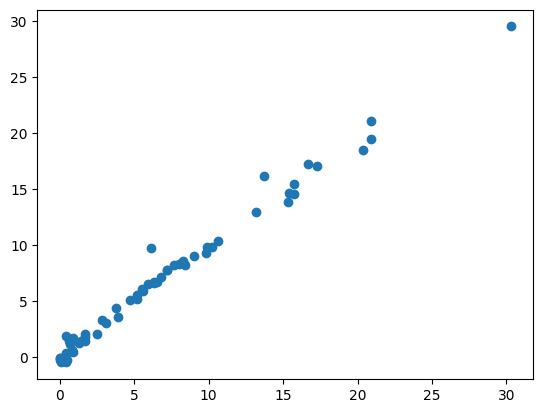

In [47]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(x_train_scaled,y_train)
y_pred_cv=ridge_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae_ridge_cv=mean_absolute_error(y_test,y_pred_cv)
score_ridge_cv=r2_score(y_test,y_pred_cv)
print("mean absolute error for ridge cv:",mae_ridge_cv)
print("r2 score for ridge cv:",score_ridge_cv)

mean absolute error for elastic: 1.8822353634895996
r2 score for elastic: 0.8753460589519704


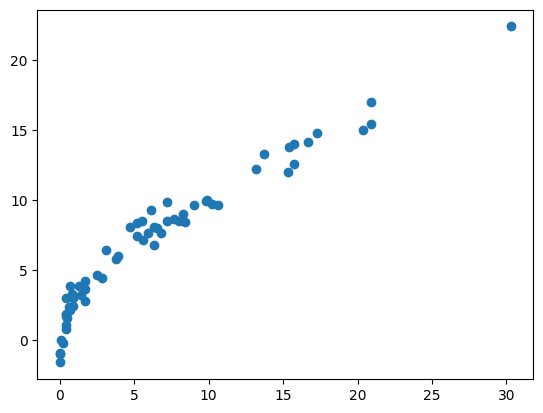

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
elastic_pred=elastic.predict(x_test_scaled)
mae_elastic=mean_absolute_error(y_test,elastic_pred)
score_elastic=r2_score(y_test,elastic_pred)
print("mean absolute error for elastic:",mae_elastic)
print("r2 score for elastic:",score_elastic)
plt.scatter(y_test,elastic_pred)

mean absolute error for elastic cv: 0.6575946731430894
r2 score for elastic cv: 0.9814217587854942


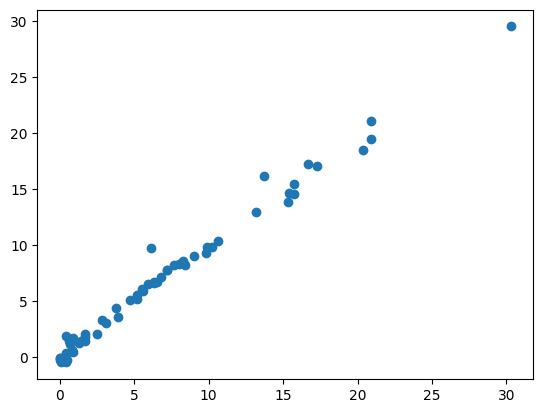

In [49]:
from sklearn.linear_model import ElasticNetCV
elastic_cv=ElasticNetCV(cv=5)
elastic_cv.fit(x_train_scaled,y_train)
y_pred_cv=elastic_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae_elastic_cv=mean_absolute_error(y_test,y_pred_cv)
score_elastic_cv=r2_score(y_test,y_pred_cv)
print("mean absolute error for elastic cv:",mae_elastic_cv)
print("r2 score for elastic cv:",score_elastic_cv)

pipckling the machine learnig model 

In [50]:
scalar

StandardScaler()

In [52]:
ridge

Ridge()

In [53]:
import pickle 
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))